# [ Seaborn 라이브러리 - 고급 그래프 도구 ] 

Seaborn은 Matplotlib의 기능과 스타일을 확장한 파이썬 시각화 도구의 고급 버전
비교적 단순한 인터페이스 제공으로 초심자에게도 어렵지 않음
Anaconda 설치 시 같이 설치됨
import seaborn as sns

(1)sns.regplot() 함수는 서로 다른 2개의 연속 변수 사이의 산점도를 그리고 선형회귀분석에 의한 회귀선을 함께 표시

(2)fig_reg=False 옵션은 회귀선을 생략
- 타이타닉 데이터 셋 이용


In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib_inline

In [2]:
titanic=sns.load_dataset('titanic')

In [3]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


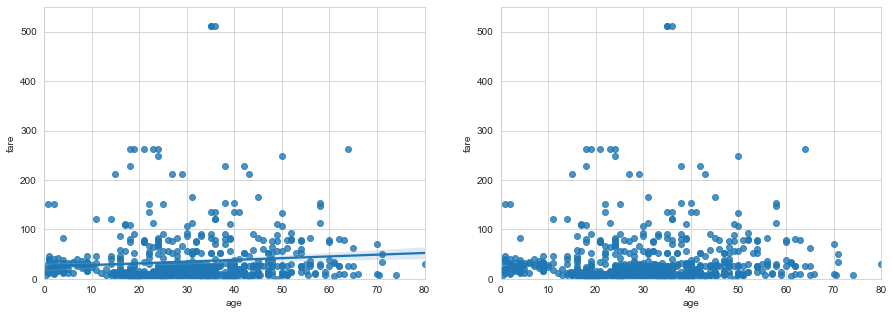

In [4]:
sns.set_style('whitegrid')

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.regplot(x='age', y='fare', data = titanic, ax=ax1)
sns.regplot(x='age', y='fare', data = titanic, fit_reg = False, ax=ax2)
# ax2.boxplot(x=[mpg_1, mpg_2, mpg_3], labels = ['USA', 'EU', 'JAPAN'], vert = False)


ax1.set_xlim(0,80)
ax2.set_xlim(0,80)
ax1.set_ylim(0,550)
ax2.set_ylim(0,550)

plt.show()

# [히스토그램 커널밀도 그래프 ]

단변수(하나의 변수) 데이터의 분포를 확인 할 떄 sns.distplot() 함수 이용
기본값으로 히스토그램과 커널 밀도 함수를 그래프로 출력


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

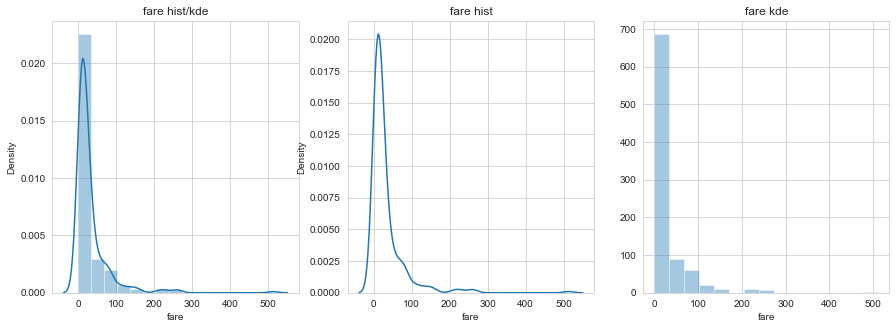

In [5]:
sns.set_style('whitegrid')

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

#displot은 x의 자리에 Series를 넣어야한다.
#Series를 불러오는 방법 데이터프레임['Series이름']

sns.distplot(titanic['fare'],ax=ax1,bins=15)
sns.distplot(titanic['fare'],ax=ax2,bins=15,hist=False)
sns.distplot(titanic['fare'],ax=ax3,bins=15,kde=False)

ax1.set_title('fare hist/kde')
ax2.set_title('fare hist')
ax3.set_title('fare kde')
plt.show()


# 히트맵 & 피벗 테이블

[ 히트맵 ]
2개의 범주형 변수를 각각 x,y축에 놓고 데이터를 매트릭스 형태로 분류


데이터프레임을 피벗 테이블로 정리할 떄 한 변수를 행 인덱스, 나머지 변수를 열 이름으로 설정


aggfunc='size' 옵션은 데이터 값을 크기를 기준으로 집계한다는 뜻
-table=titanic.pivot_table(index['sex'],colums=['class'],aggfunc='size')


히트맵 그리기 heatmap()
데이터 프레임 ,데이터 값 표시 여부 , 정수형 포맷, 컬러맵, 구분 선,컬러 바 표시 여부

In [84]:
table=titanic.pivot_table(index=['sex'],columns=['class'],aggfunc='size')
table

class,First,Second,Third
sex,,,
female,94,76,144
male,122,108,347


<AxesSubplot:xlabel='class', ylabel='sex'>

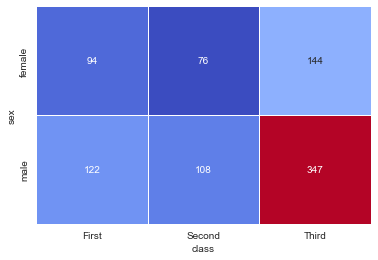

In [96]:
sns.heatmap(table,annot=True,cmap='coolwarm',fmt='d',lw=1,cbar=False)
#annot=True : 값 표시 , fmt :어떤 숫자로 표시할건지 정하는 것 (정수형 포맷) ,lw :선 구분,
# cbar=False : 컬러 바 비활성 ,cmap='YlGnBu' : 컬러 설정, 상관관계 파악 시 coolwarm이 좋다

In [98]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


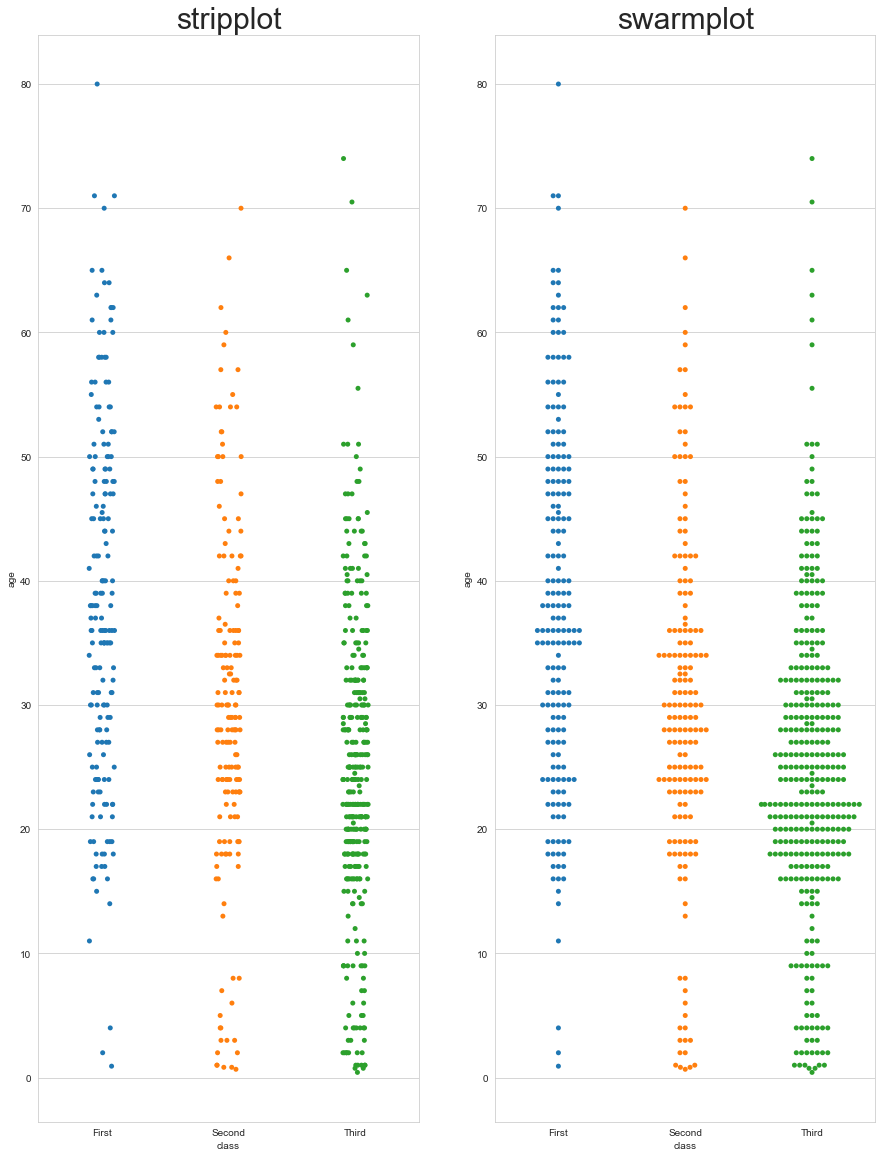

In [8]:
# [실습] 그래프 객체 생성(figure에 2개의 서브 플롯 생성)
# 이산형 변수의 분포 - 데이터 분산 미고려 (x,y,data,ax1)
# 이산형 변수의 분포 - 데이터 분산 고려 (중복x),(x,y,data,ax2)
#차트 제목 표시
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

fig = plt.figure(figsize=(15,20))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.stripplot(x='class',y='age',data=titanic,ax=ax1)
sns.swarmplot(x='class',y='age',data=titanic,ax=ax2)
ax1.set_title('stripplot',size=30)
ax2.set_title('swarmplot',size=30)
plt.show()

# 막대 그래프

barplot() 함수는 지정한 변수의 평균을 계산하여 그림

데이터의 개수가 아닌 평균을 계산한다.
막대그래프 위에 덧그려진 검은 선은 95%의 신뢰구간

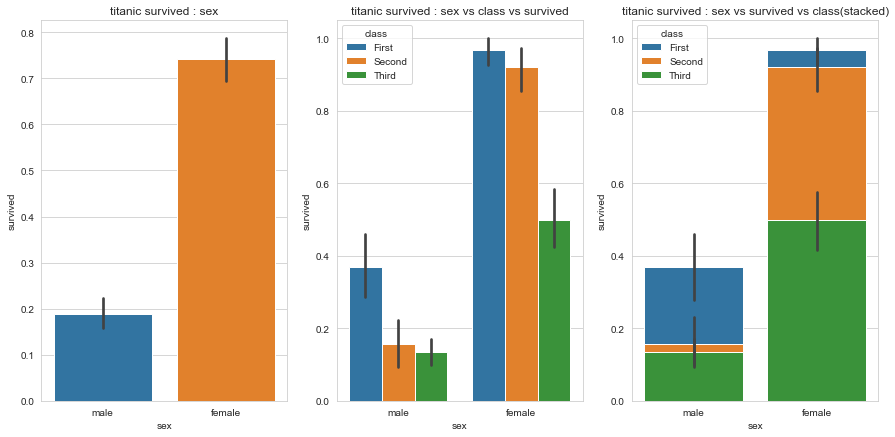

In [11]:
#그래프 객체 생성( fig 3ea subplot)
#x축,y축 (/sex,survived,data,ax1)
#x축,y축 할당하고 hue 옵션 추가 (sex,survived,class,data,ax2)
#x축,y축에 변수 할당하고 hue 옵션을 추가하여 누적 출력(sex,survived,class,dodge,data,ax3)
fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.barplot(x='sex',y='survived',data=titanic,ax=ax1)
sns.barplot(x='sex',y='survived',hue='class',data=titanic,ax=ax2)
sns.barplot(x='sex',y='survived',hue=('class'),dodge=False,data=titanic,ax=ax3)
#dodge 옵션 : False - stacked 
#hue parameter를 추가하여 여러개의 막대를 표시할 수도 있습니다.

ax1.set_title('titanic survived : sex')
ax2.set_title('titanic survived : sex vs class vs survived')
ax3.set_title('titanic survived : sex vs survived vs class(stacked)')
plt.show()

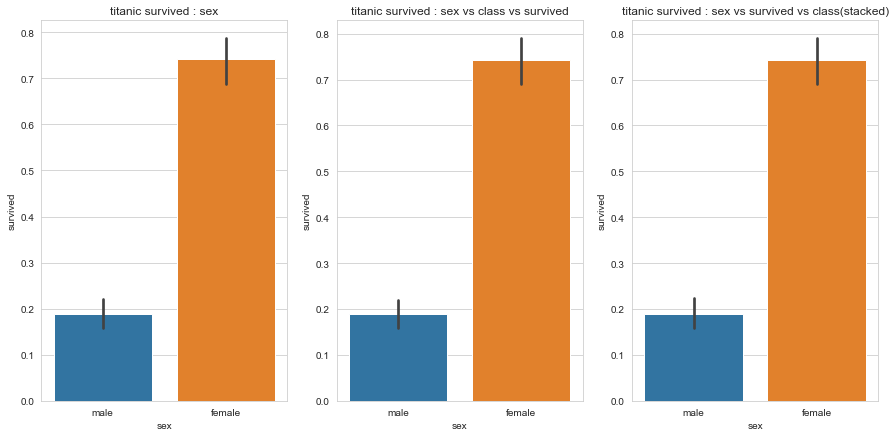

In [14]:
#그래프 객체 생성( fig 3ea subplot)
#x축,y축 (/sex,survived,data,ax1)
#x축,y축 할당하고 hue 옵션 추가 (sex,survived,class,data,ax2)
#x축,y축에 변수 할당하고 hue 옵션을 추가하여 누적 출력(sex,survived,class,dodge,data,ax3)
fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.barplot(x='sex',y='survived',data=titanic,ax=ax1)
sns.barplot(x='sex',y='survived',data=titanic,ax=ax2)
sns.barplot(x='sex',y='survived',dodge=False,data=titanic,ax=ax3)
#dodge 옵션 : False - stacked 
#hue parameter를 추가하여 여러개의 막대를 표시할 수도 있습니다.

ax1.set_title('titanic survived : sex')
ax2.set_title('titanic survived : sex vs class vs survived')
ax3.set_title('titanic survived : sex vs survived vs class(stacked)')
plt.show()

In [17]:
a=titanic.loc[titanic['sex']=='male','survived'].mean()
b=titanic.loc[titanic['sex']=='female','survived'].mean()
print(a)
print(b)

0.18890814558058924
0.7420382165605095


# 빈도 그래프 ( countplot() )

각 범주에 속하는 데이터의 개수를 막대 그래프로 표현

# [ 박스 플롯 / 바이올린 플롯 ]

boxplt()은 범주형 데이터 분포와 주요 통계 지표 함께 제공
- 분산 파악 어려움
그래서 커널 밀도 함수 그래프를 y축 방향에 추가하여 바이올린 플롯(violinplot() )

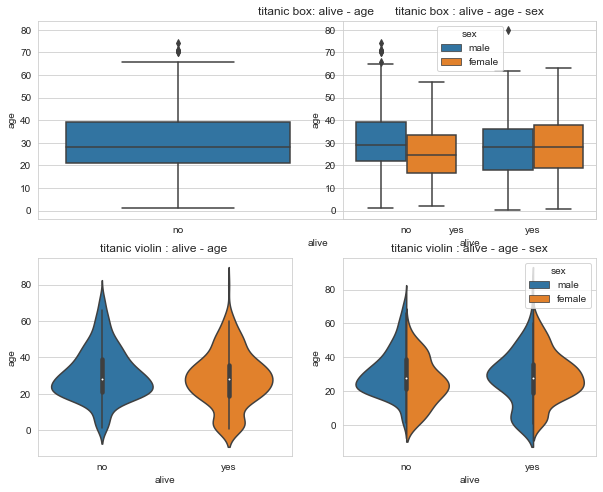

In [18]:
#그래프 객체 4개 생성 ( 서브 플롯 )
#박스 그래프 기본값 (alive - age)
#박스 그래프 hue 옵션 추가 (alive - age - sex)
#바이올린 그래프 - 기본값 (alive - age)
#바이올린 그래프 - hue 옵션 추가 ( alive - age -sex)

fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

sns.boxplot(x='alive',y='age',data=titanic,ax=ax1)
sns.boxplot(x='alive',y='age',hue='sex',data=titanic,ax=ax2)
sns.violinplot(x='alive',y='age',data=titanic,ax=ax3)
sns.violinplot(x='alive',y='age',hue='sex',split=True,data=titanic,ax=ax4)



ax1.set_title('titanic box: alive - age ')
ax2.set_title('titanic box : alive - age - sex')
ax3.set_title('titanic violin : alive - age ')
ax4.set_title('titanic violin : alive - age - sex')
plt.show()


# 조인트 그래프

jointplot() 함수는 산점도를 기본으로 표시하고 x-y축에 각 변수에 대한 히스토그램을 동시에 보여줌

두 변수의 관계와 데이터가 분산되어 있는 정도를 한눈에 파악하기에 장점

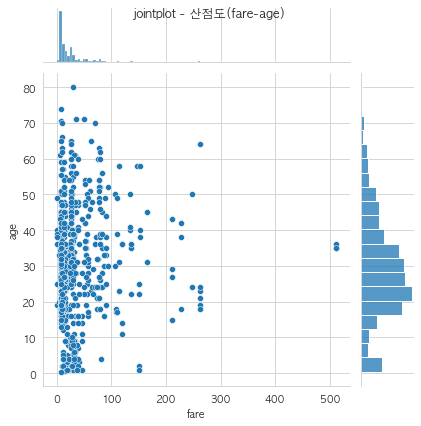

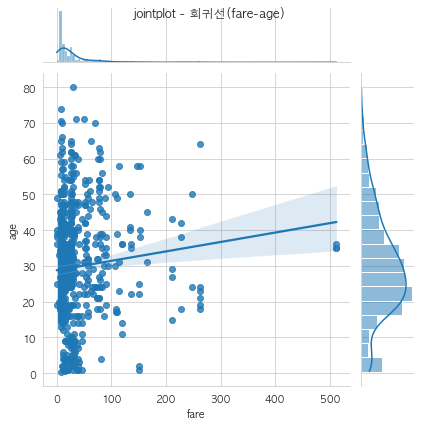

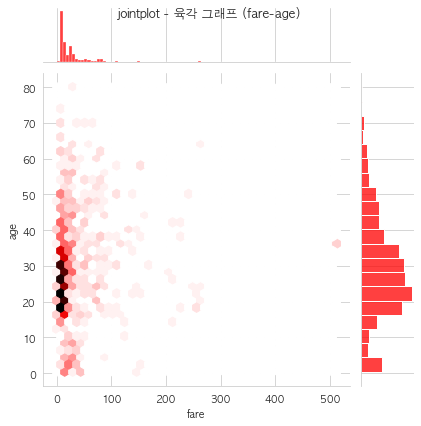

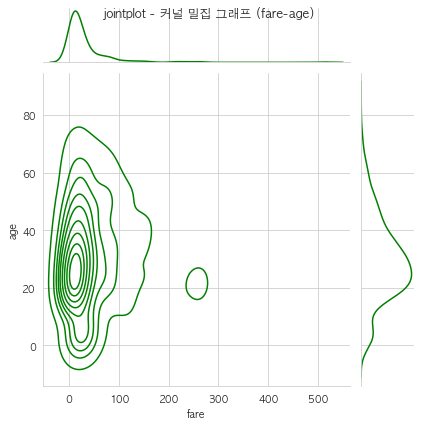

In [19]:
# 조인트 그래프 - 산점도(기본값) - (fare,age,data)
# 회귀선 (fare ,age, kind='reg',data)
# 육각 그래프 (fare ,age,hex,data)
# 커널 밀집 그래프 (fare,age,kde,data)
# 차트 제목 표시

plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

ax1=sns.jointplot(x='fare',y='age',data=titanic)
ax2=sns.jointplot(x='fare',y='age',kind='reg',data=titanic)
ax3=sns.jointplot(x='fare',y='age',kind='hex',data=titanic,color='r')
ax4=sns.jointplot(x='fare',y='age',kind='kde',data=titanic,color='g')
ax1.fig.suptitle('jointplot - 산점도(fare-age)')
ax2.fig.suptitle('jointplot - 회귀선(fare-age)')
ax3.fig.suptitle('jointplot - 육각 그래프 (fare-age)')
ax4.fig.suptitle('jointplot - 커널 밀집 그래프 (fare-age)')

plt.show()


# FaceGrid ()

함수는 행,열 방향으로 서로 다른 조건을 적용하여 여러 개의 서브 플롯 생성

각 서브 플롯에 적용할 그래프 종류를 map() 메소드를 이용하여 그리드 객체에 전달

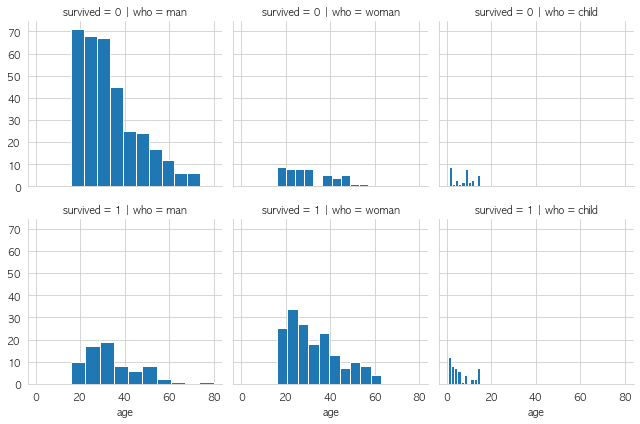

In [176]:
g=sns.FacetGrid(data=titanic,row='survived',col='who')
# row(열) : 생존 or 비생존 2개로 나오게 된다
# col(컬럼) : 남자 /여자 /어린아이 3개의 항목
g.map(plt.hist,'age')
plt.show()

# 이변수 데이터의 분포

pairplot()

인자로 전달되는 데이터프레임의 열(변수)을 두 개씩 짝을 지을 수 있는 모든 조합에 대해 표현

그래프를 그리기 위해 만들어진 짝의 개수만큼 화면을 그리드로 나눔

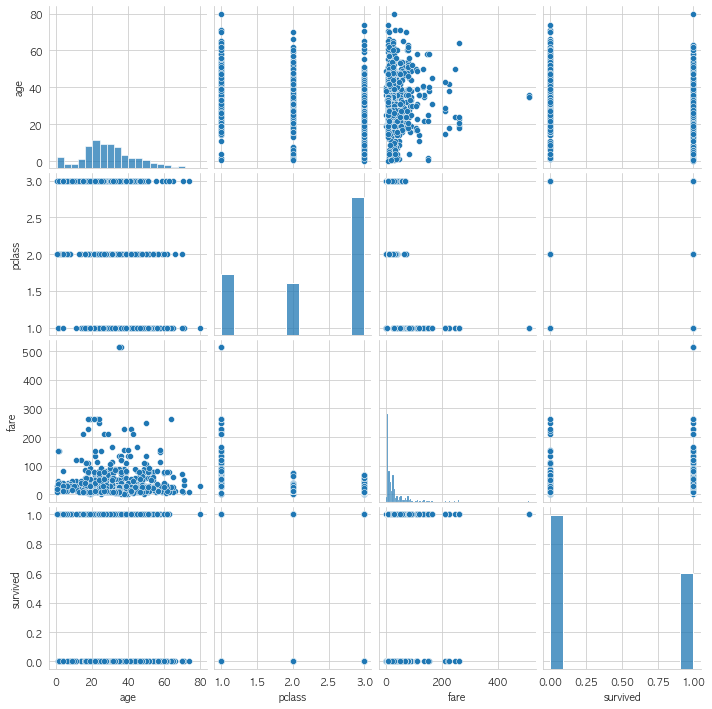

In [179]:
pair=titanic[['age','pclass','fare','survived']]
sns.pairplot(pair)